In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")

In [3]:
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

## Categorical plots

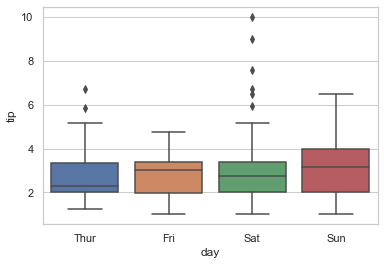

In [4]:
sns.boxplot(x="day",y="tip", data = tips)

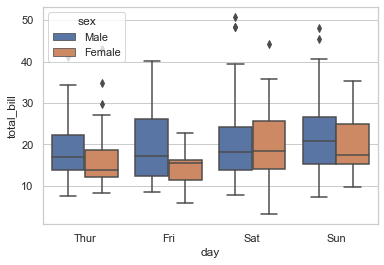

In [5]:
ax = sns.boxplot(x="day",y="total_bill", hue="sex", data = tips)
#ax.set_xlabel("Week")
#ax.set_title("Day-wise Total Bill for Male and Female")

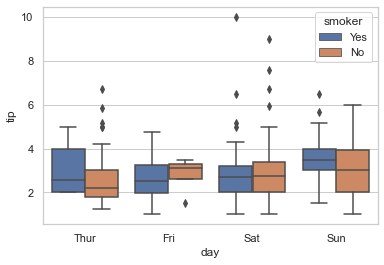

In [6]:
ax = sns.boxplot(x="day",y="tip", hue="smoker", data = tips)

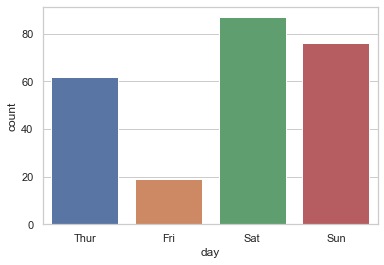

In [7]:
sns.countplot(x="day",data = tips)

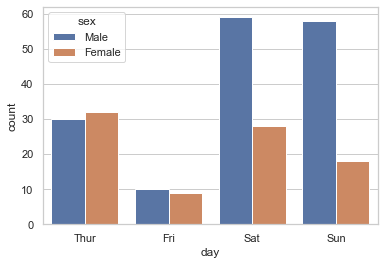

In [8]:
# plt.figure(figsize=(15,6))
sns.countplot(x="day",data = tips, hue="sex")

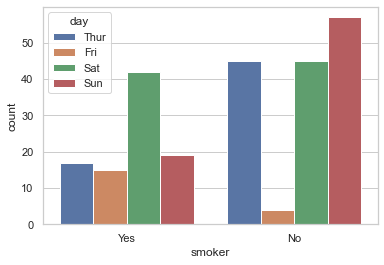

In [9]:
# plt.figure(figsize=(15,6))
sns.countplot(x="smoker",data = tips, hue="day")

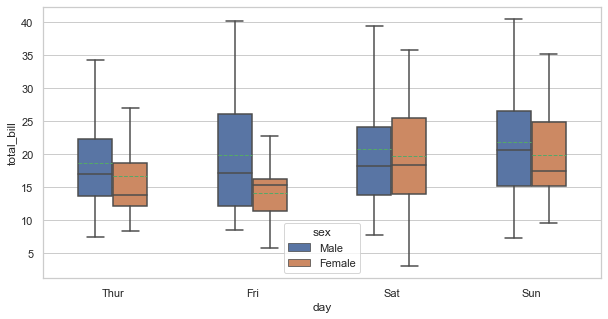

In [10]:
# Add extra parameters realted to matplotlib
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="day",y="total_bill",hue="sex", data = tips,
            showmeans=True, meanline=True, showfliers=False, width=0.5)

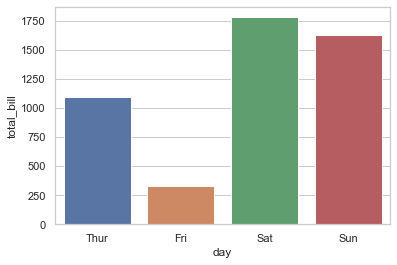

In [11]:
# Default estimator is mean 
sns.barplot(x="day",y="total_bill", ci=False, data = tips,estimator=sum)

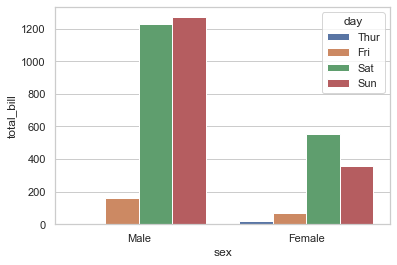

In [12]:
sns.barplot(x="sex",y="total_bill", hue="day", ci=False, data = tips [ tips.time == 'Dinner'],estimator=sum)

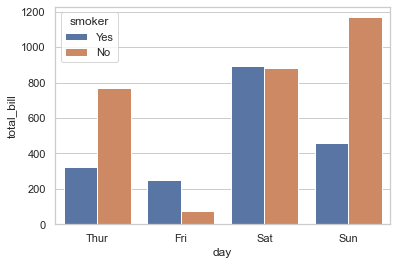

In [14]:
sns.barplot(x="day",y="total_bill",data=tips,hue="smoker",ci=False, estimator=sum)

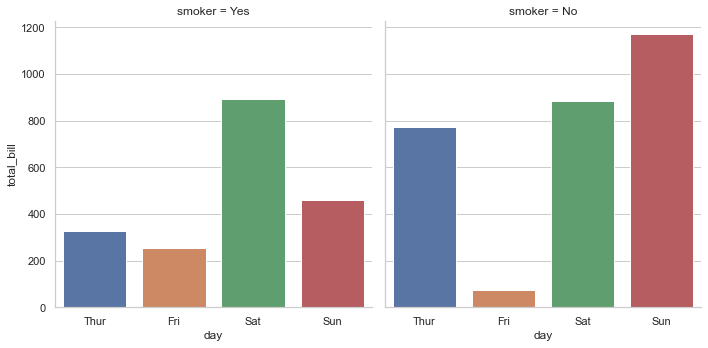

In [13]:
# Figure level API
sns.catplot(x="day",y="total_bill",data=tips,col="smoker", kind='bar', ci=False, estimator=sum)

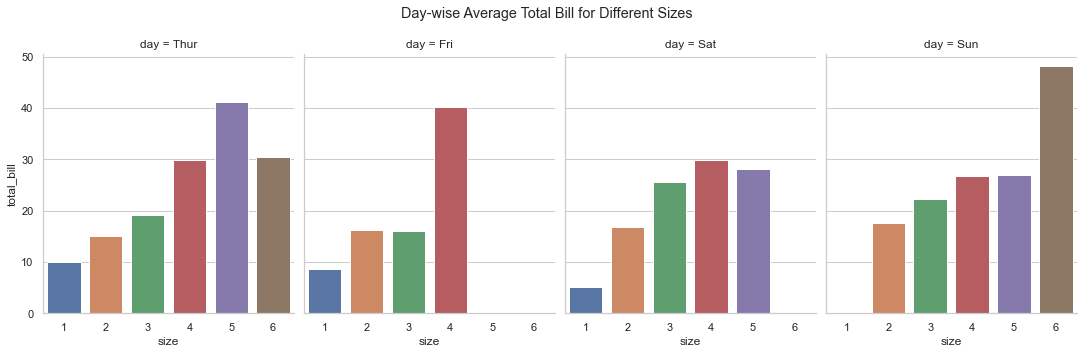

In [19]:
# Figure level API
ax = sns.catplot(x="size",y="total_bill",data=tips, col="day", kind='bar', ci=False)
ax.fig.suptitle("Day-wise Average Total Bill for Different Sizes")
ax.fig.set_size_inches(15,5)
ax.fig.subplots_adjust(top=.85)

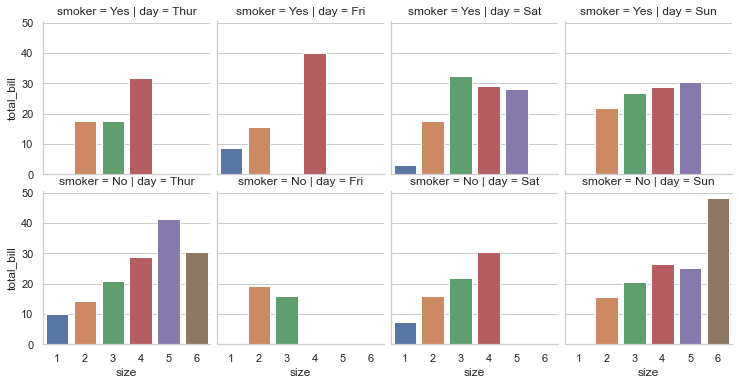

In [21]:
ax = sns.catplot(x="size",y="total_bill",data=tips, col="day", row="smoker", kind='bar', ci=False)
plt.gcf().set_size_inches(10,5)

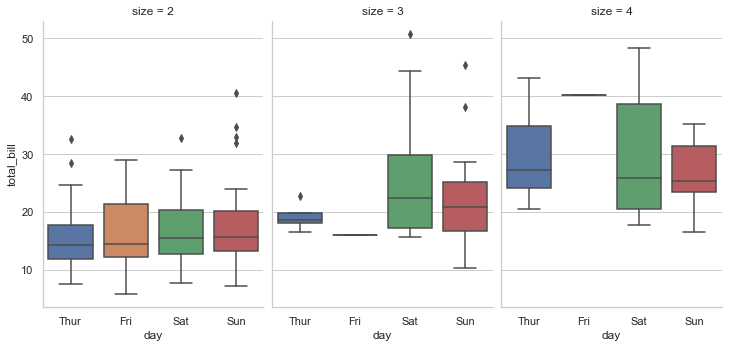

In [23]:
seltips = tips[tips['size'].isin([2,3,4])]
sns.catplot(x="day",y="total_bill",data=seltips,col="size", kind='box')
plt.gcf().set_size_inches(10,5)  # Change current figure size 

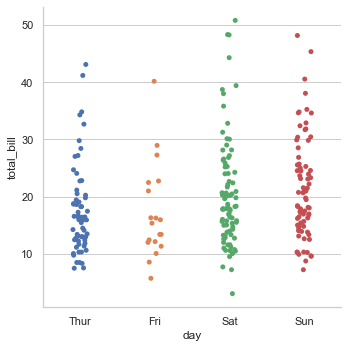

In [24]:
sns.catplot(x="day",y="total_bill",data=tips)   # Strip plot

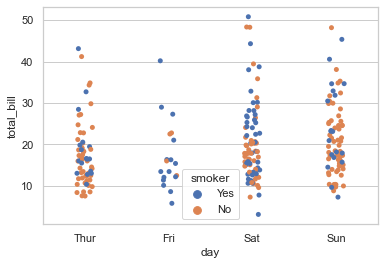

In [26]:
sns.stripplot(x="day",y="total_bill", hue='smoker',data=tips)   # Strip 

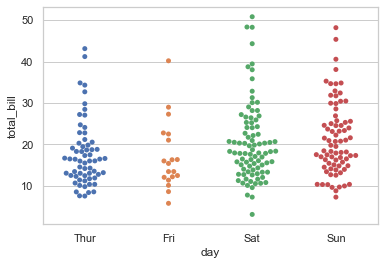

In [28]:
sns.swarmplot(x="day",y="total_bill",data=tips)   # Swarm plot

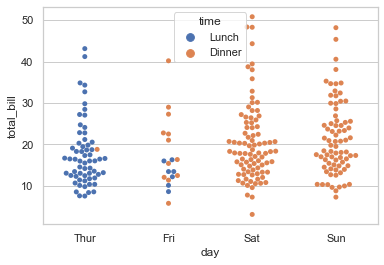

In [30]:
sns.swarmplot(x="day",y="total_bill",hue='time',data=tips)   # Swarm plot

## Flights 

In [35]:
flights.sample(5)

,year,month,passengers
26,1951,March,178
36,1952,January,171
91,1956,August,405
46,1952,November,172
18,1950,July,170


In [32]:
flights.groupby('month')['passengers'].sum()

month
January      2901
February     2820
March        3242
April        3205
May          3262
June         3740
July         4216
August       4213
September    3629
October      3199
November     2794
December     3142
Name: passengers, dtype: int64

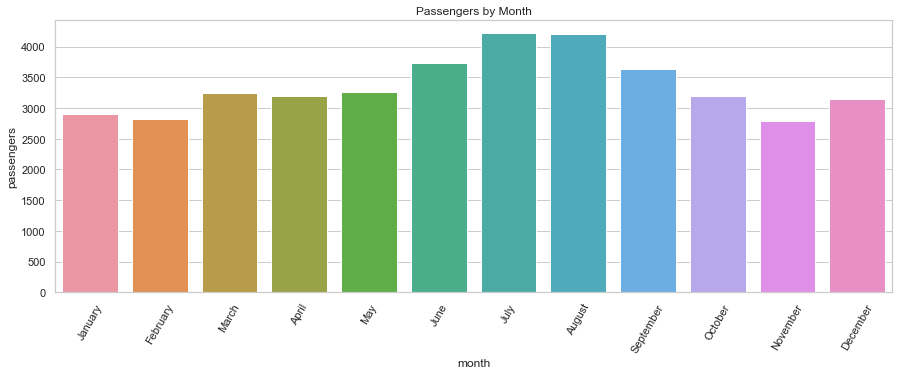

In [33]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=60)
plt.title('Passengers by Month')
sns.barplot(x="month",y="passengers",data=flights,ci=False,estimator=np.sum)

## Relational plots

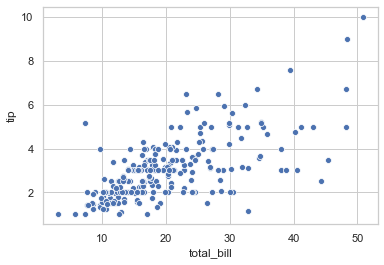

In [36]:
sns.scatterplot(x="total_bill",y="tip", data=tips) 

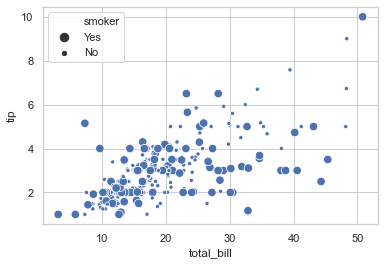

In [40]:
sns.scatterplot(x="total_bill",y="tip", data=tips, size="smoker")

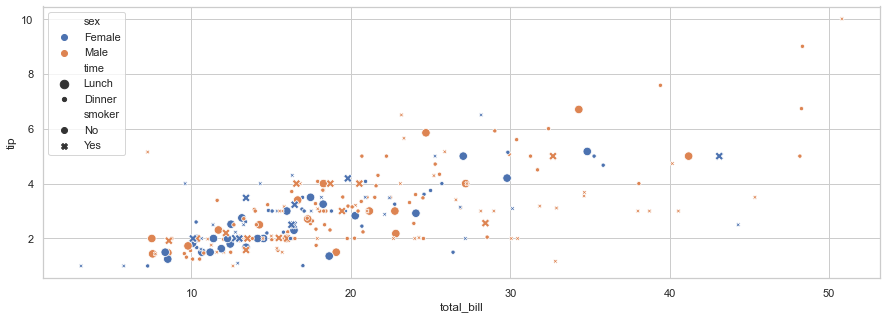

In [43]:
sns.scatterplot(x="total_bill",y="tip",hue='sex', style="smoker", size="time", data=tips)
plt.gcf().set_size_inches(15,5)

In [50]:
flights.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


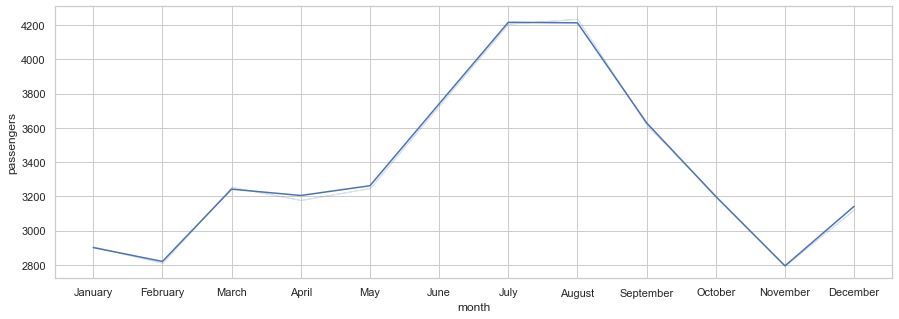

In [44]:
sns.lineplot(x='month', y = 'passengers', estimator=sum, data = flights,ci = False)
plt.gcf().set_size_inches(15,5)

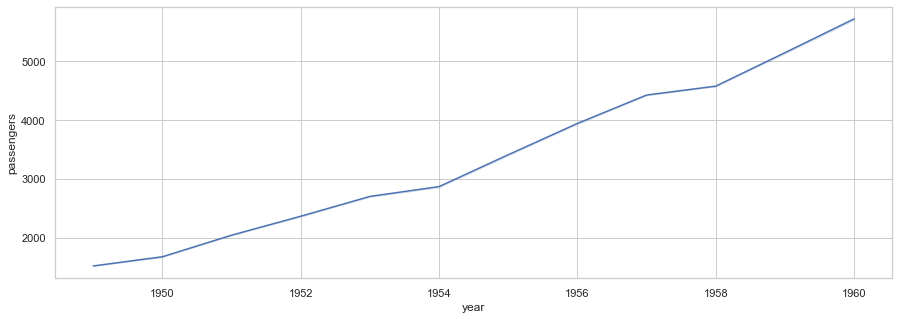

In [45]:
plt.figure(figsize=(15,5))
sns.lineplot(x="year", y="passengers", estimator=sum, data=flights,ci=False)

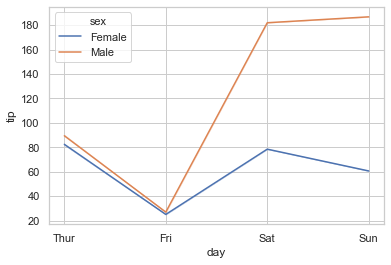

In [47]:
sns.lineplot(x='day', y = 'tip', data=tips, estimator=sum, hue='sex', ci= False)

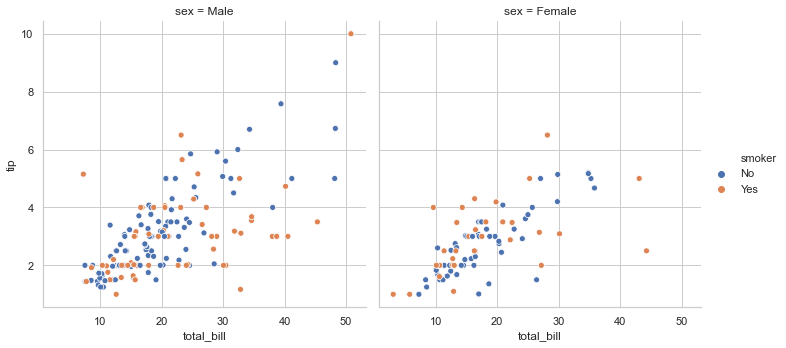

In [48]:
# Figure level 
sns.relplot(x="total_bill",y="tip",col="sex", hue="smoker", data=tips)

## Distribution plots

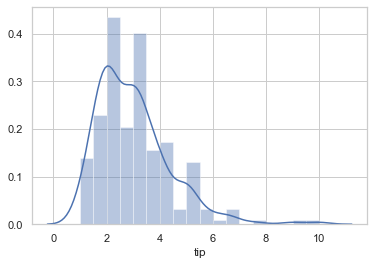

In [22]:
sns.distplot(tips['tip'])

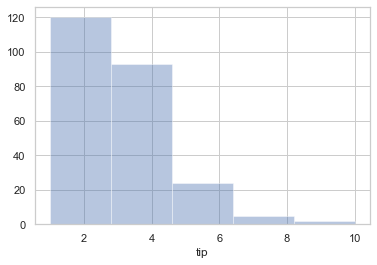

In [23]:
sns.distplot(tips['tip'],bins=5, kde=False)

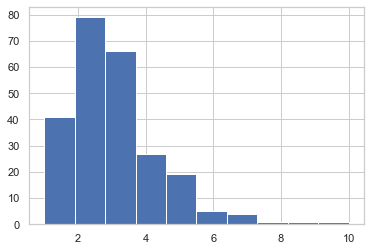

In [5]:
tips.tip.hist()

### pairplot

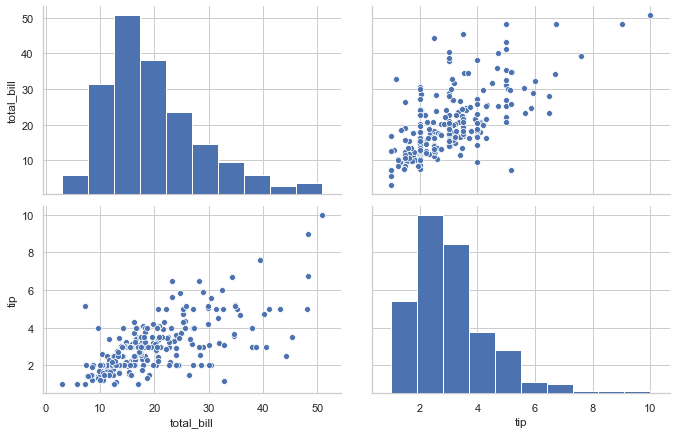

In [24]:
sns.pairplot(tips,vars=['total_bill','tip'])
plt.gcf().set_size_inches(10,6)

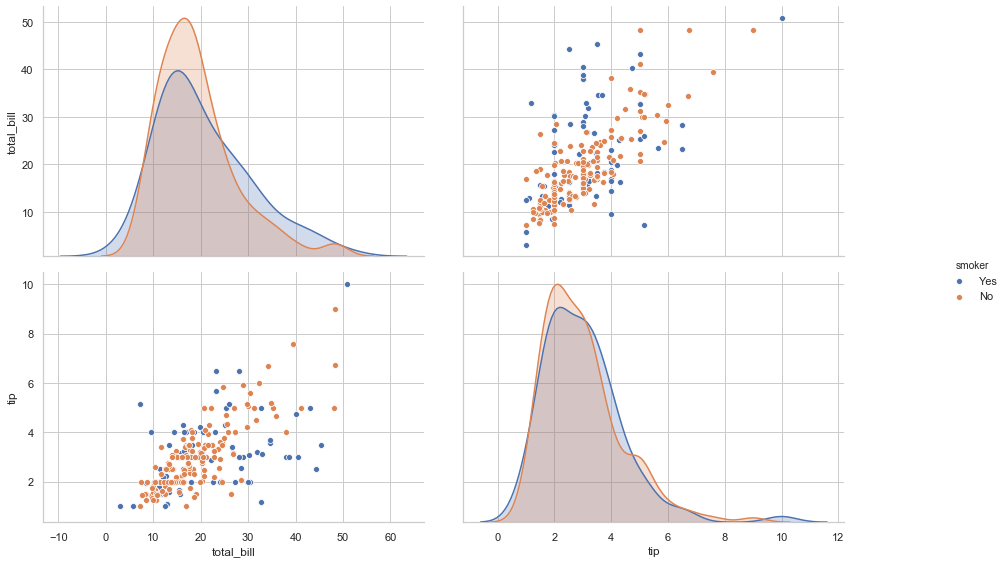

In [25]:
sns.pairplot(tips,vars=['total_bill','tip'], hue='smoker')
plt.gcf().set_size_inches(15,8)

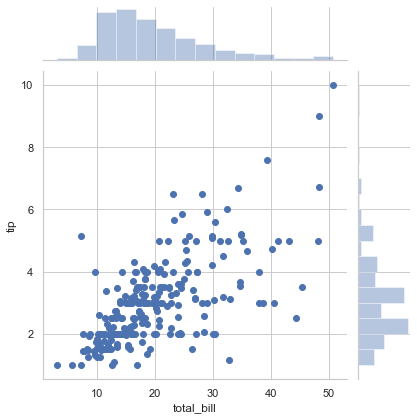

In [27]:
sns.jointplot(x='total_bill', y = 'tip', data = tips)

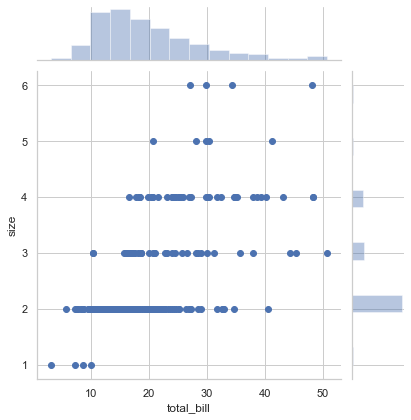

In [28]:
sns.jointplot(x='total_bill', y = 'size', data = tips)

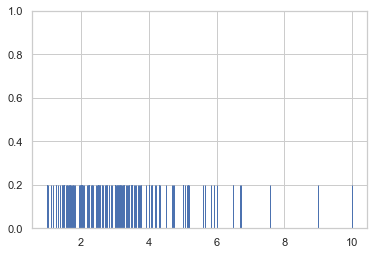

In [30]:
sns.rugplot(tips['tip'],0.2)

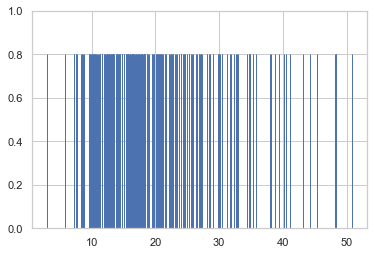

In [25]:
sns.rugplot(tips['total_bill'], height=.8)

## Regression Plot

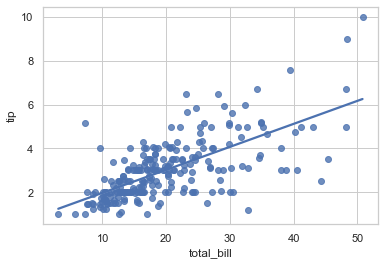

In [26]:
sns.regplot(x="total_bill",y='tip', data=tips, ci=False)

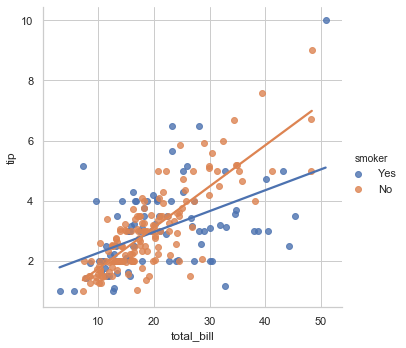

In [27]:
sns.lmplot(x="total_bill",y='tip',hue="smoker", data=tips,ci=False)

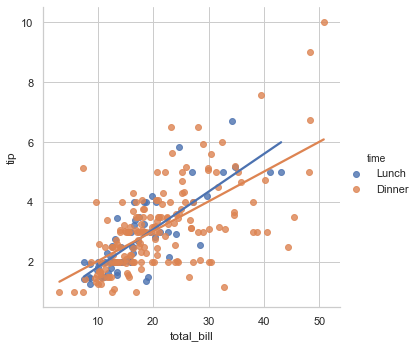

In [29]:
sns.lmplot(x="total_bill",y='tip',hue="time",data=tips,ci=False)

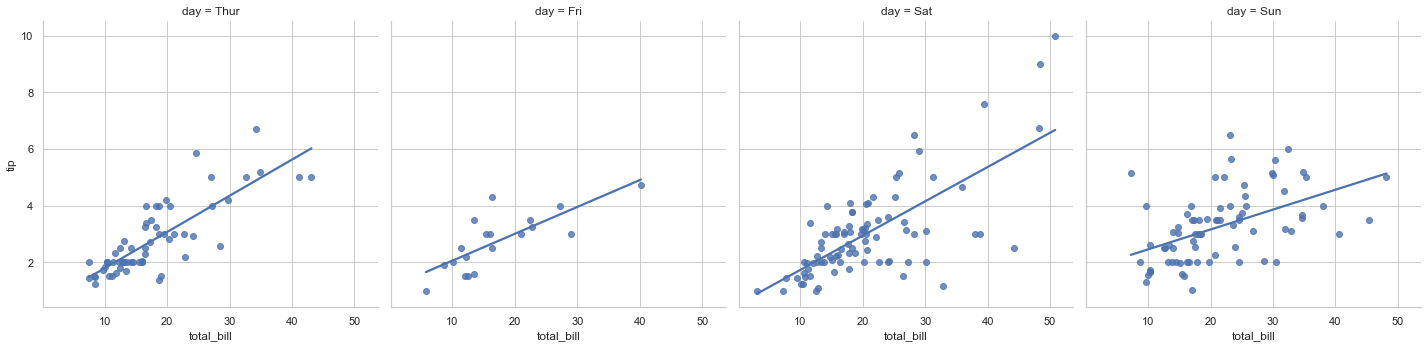

In [30]:
sns.lmplot(x="total_bill",y='tip',col='day', data=tips,ci=False)

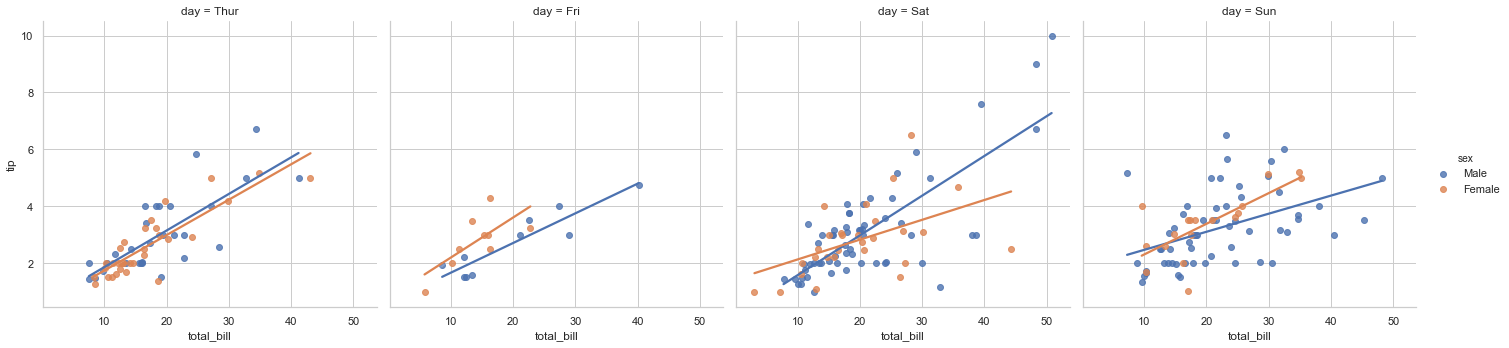

In [28]:
sns.lmplot(x="total_bill",y='tip',col='day', hue='sex', data=tips,ci=False)

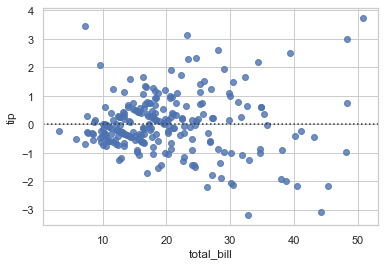

In [34]:
sns.residplot(x="total_bill",y='tip',data=tips)

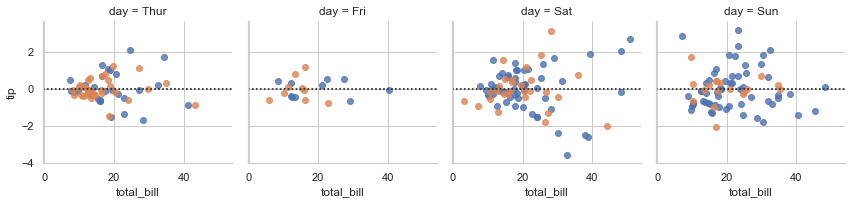

In [51]:
g = sns.FacetGrid(tips,col="day", hue="sex")
g = g.map(sns.residplot, "total_bill", "tip")

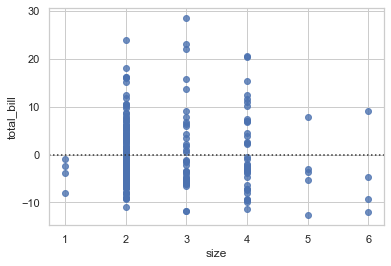

In [21]:
sns.residplot(x="size",y='total_bill', data=tips)

## Matrix plots

In [30]:
day_tips = tips.groupby('day', as_index=False)['tip','total_bill'].sum()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [23]:
day_tips

,day,tip,total_bill
0,Thur,171.83,1096.33
1,Fri,51.96,325.88
2,Sat,260.40,1778.40
3,Sun,247.39,1627.16


In [35]:
ds = tips.pivot_table (index = "day", columns = "time", values="total_bill", aggfunc=np.sum)
ds

time,Lunch,Dinner
day,,
Thur,1077.55,18.78
Fri,89.92,235.96
Sat,NaN,1778.40
Sun,NaN,1627.16


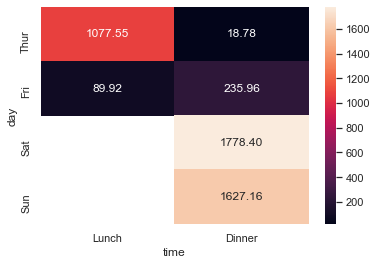

In [37]:
sns.heatmap(ds, annot=True,fmt=".2f")

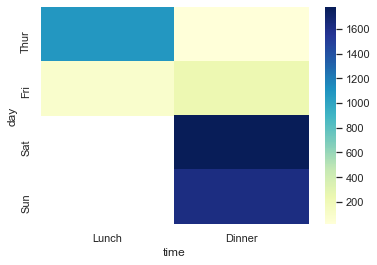

In [38]:
sns.heatmap(ds,cmap='YlGnBu')

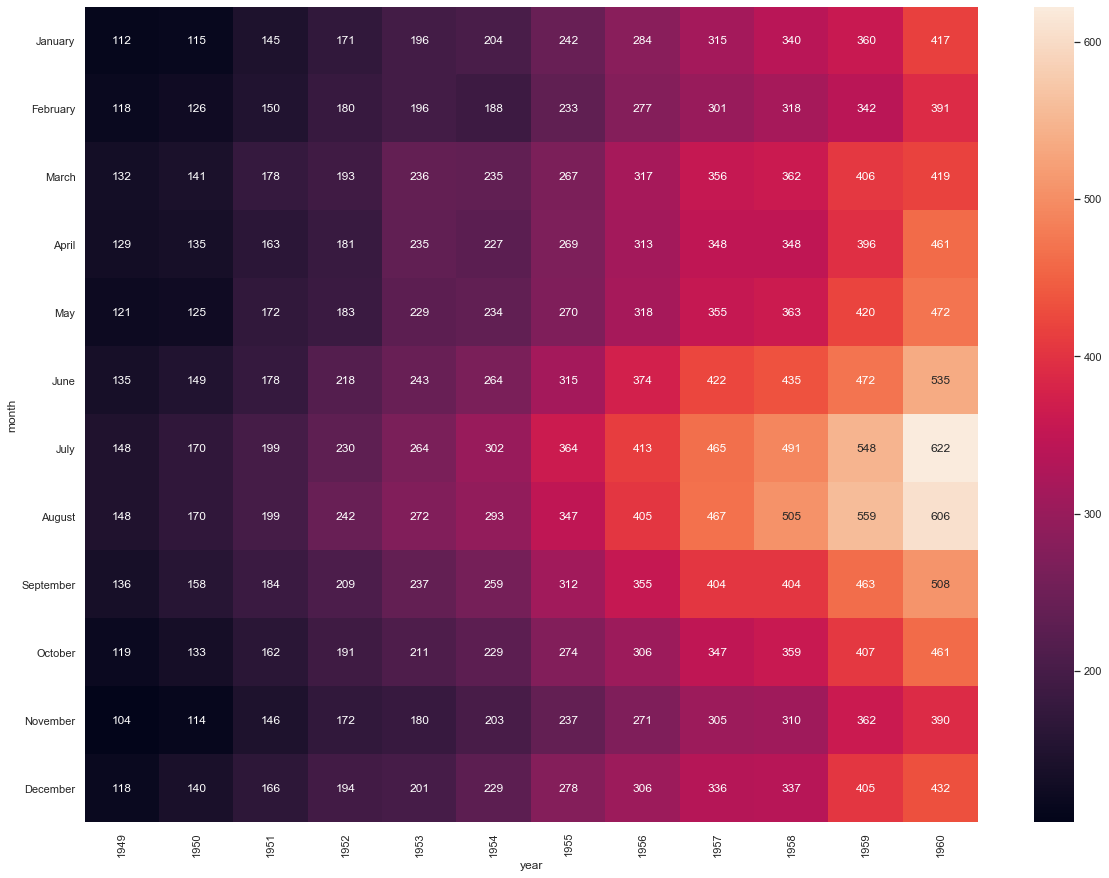

In [39]:
fl_summary = flights.pivot('month','year','passengers')
# print(fl_summary)
ax = sns.heatmap(fl_summary,annot=True, fmt=".0f")
plt.gcf().set_size_inches(20,15)

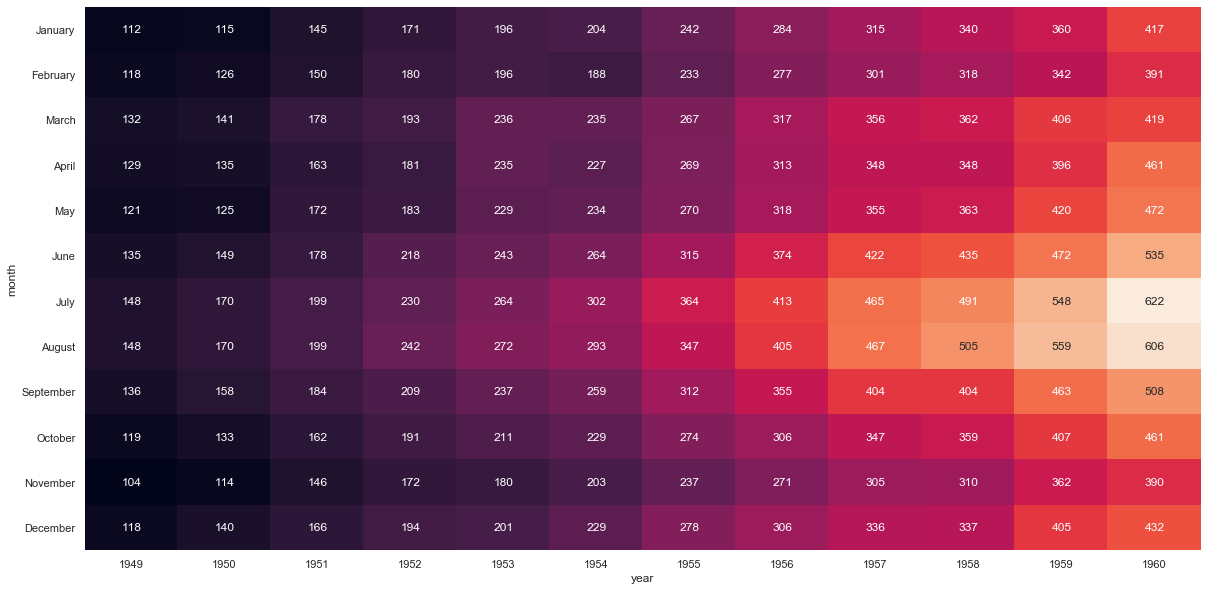

In [30]:
fl_summary = flights.pivot('month','year','passengers')
ax = sns.heatmap(fl_summary,annot=True, fmt=".0f", cbar=False)
plt.gcf().set_size_inches(20,10)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


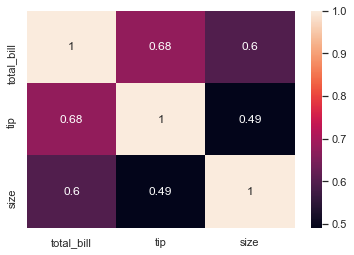

In [40]:
cm = tips.corr()
print(cm)
sns.heatmap(cm, annot=True)